# 18th May

In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler

In [2]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [3]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [4]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#gather 1000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-05-18', tweet_mode='extended').items(1000)

#store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [6]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,#Bitcoin millionaires are moving to Puerto Ric...
1,@BluesparrowC @NatashaCryptoUS #bluesparrow al...
2,@BluesparrowC @CoinMarketCap @BlueSparrowETH T...
3,@BluesparrowC @NatashaCryptoUS #bluesparrow al...
4,"Current Price of SOLANA (SOL): $ 142.43, 24H C..."
5,#Bitcoin attacking the H1 EMA30 again.\nIt has...
6,@BabyDogeCoin #BabyDogeCoin #BabyDoge #BabyDog...
7,#Bitcoin #btc\n\nhelp me with donate 1 #bitcoi...
8,"Adding to the anticipation, the AP has created..."
9,#Bitcoin attacking the H1 EMA30 again.\nIt has...


In [7]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [8]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,#Bitcoin millionaires are moving to Puerto Ric...,Bitcoin millionaires are moving to Puerto Rico...
1,@BluesparrowC @NatashaCryptoUS #bluesparrow al...,@BluesparrowC @NatashaCryptoUS always turn a ...
2,@BluesparrowC @CoinMarketCap @BlueSparrowETH T...,@BluesparrowC @CoinMarketCap @BlueSparrowETH T...
3,@BluesparrowC @NatashaCryptoUS #bluesparrow al...,@BluesparrowC @NatashaCryptoUS always turn a ...
4,"Current Price of SOLANA (SOL): $ 142.43, 24H C...","Current Price of SOLANA (SOL): $ 142.43, 24H C..."


In [9]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,#Bitcoin millionaires are moving to Puerto Ric...,Bitcoin millionaires are moving to Puerto Rico...,0.000000,0.000000
1,@BluesparrowC @NatashaCryptoUS #bluesparrow al...,@BluesparrowC @NatashaCryptoUS always turn a ...,0.472727,-0.036364
2,@BluesparrowC @CoinMarketCap @BlueSparrowETH T...,@BluesparrowC @CoinMarketCap @BlueSparrowETH T...,0.866667,0.666667
3,@BluesparrowC @NatashaCryptoUS #bluesparrow al...,@BluesparrowC @NatashaCryptoUS always turn a ...,0.472727,-0.036364
4,"Current Price of SOLANA (SOL): $ 142.43, 24H C...","Current Price of SOLANA (SOL): $ 142.43, 24H C...",0.575000,0.187500
5,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...,0.393750,-0.156250
6,@BabyDogeCoin #BabyDogeCoin #BabyDoge #BabyDog...,@BabyDogeCoin lets go moon 🚀🚀🌕Bitcoin,0.000000,0.000000
7,#Bitcoin #btc\n\nhelp me with donate 1 #bitcoi...,Bitcoin help me with donate 1 bitcoin pleasebi...,0.000000,0.000000
8,"Adding to the anticipation, the AP has created...","Adding to the anticipation, the AP has created...",0.166667,0.125000
9,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...,0.393750,-0.156250


In [10]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [11]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,#Bitcoin millionaires are moving to Puerto Ric...,Bitcoin millionaires are moving to Puerto Rico...,0.000000,0.000000,Neutral
1,@BluesparrowC @NatashaCryptoUS #bluesparrow al...,@BluesparrowC @NatashaCryptoUS always turn a ...,0.472727,-0.036364,Negative
2,@BluesparrowC @CoinMarketCap @BlueSparrowETH T...,@BluesparrowC @CoinMarketCap @BlueSparrowETH T...,0.866667,0.666667,Positive
3,@BluesparrowC @NatashaCryptoUS #bluesparrow al...,@BluesparrowC @NatashaCryptoUS always turn a ...,0.472727,-0.036364,Negative
4,"Current Price of SOLANA (SOL): $ 142.43, 24H C...","Current Price of SOLANA (SOL): $ 142.43, 24H C...",0.575000,0.187500,Positive
5,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...,0.393750,-0.156250,Negative
6,@BabyDogeCoin #BabyDogeCoin #BabyDoge #BabyDog...,@BabyDogeCoin lets go moon 🚀🚀🌕Bitcoin,0.000000,0.000000,Neutral
7,#Bitcoin #btc\n\nhelp me with donate 1 #bitcoi...,Bitcoin help me with donate 1 bitcoin pleasebi...,0.000000,0.000000,Neutral
8,"Adding to the anticipation, the AP has created...","Adding to the anticipation, the AP has created...",0.166667,0.125000,Positive
9,#Bitcoin attacking the H1 EMA30 again.\nIt has...,Bitcoin attacking the H1 EMA30 again.It has be...,0.393750,-0.156250,Negative


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


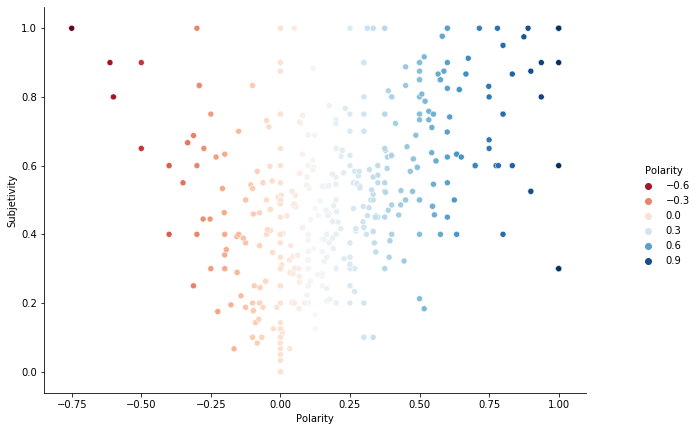

In [12]:
ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

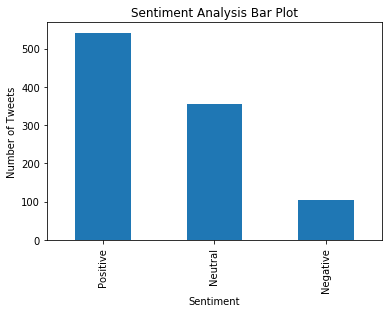

In [13]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [14]:
df['Sentiment'].value_counts()

Positive    541
Neutral     355
Negative    104
Name: Sentiment, dtype: int64

In [15]:
val_count = list(df['Sentiment'].value_counts())
val_count

[541, 355, 104]

In [16]:
lst_df = list(df['Sentiment'].value_counts())
lst_df

[541, 355, 104]

In [17]:
dfs = pd.read_csv("f_sentiments.csv")
  
# updating the column value/data
dfs.loc[8, 'Sentiment'] = 'day 9'
dfs.loc[8, 'Positive'] = lst_df[0]
dfs.loc[8, 'Neutral'] = lst_df[1]
dfs.loc[8, 'Negative'] = lst_df[2]
  
# writing into the file
dfs.to_csv("f_sentiments.csv", index=False)
  
print(dfs)

  Sentiment  Positive  Neutral  Negative
0     day 1     540.0    414.0      46.0
1     day 2     542.0    412.0      46.0
2     day 3     578.0    377.0      45.0
3     day 4     530.0    382.0      88.0
4     day 5     601.0    351.0      48.0
5     day 6     603.0    348.0      49.0
6     day 7     516.0    383.0     101.0
7     day 8     525.0    375.0     100.0
8     day 9     541.0    355.0     104.0
